# Handwritten digits classification using neural network
--> Classifying handwritten digits using a simple neural network which has only input and output layers. We will than add a hidden layer and see how the performance of the model improves

In [29]:
# !pip install Keras
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 4s 0us/step


In [4]:
len(X_train)

60000

In [5]:
len(X_test)

10000

In [6]:
X_train[0].shape


(28, 28)

In [7]:
X_train[0]  # 0 = black , 255 = white 

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

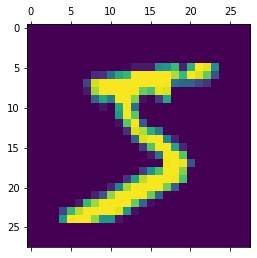

In [8]:
plt.matshow(X_train[0])  # for showing above train image

4

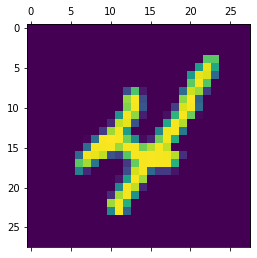

In [14]:
# Handwritten digits examples from training data
# plt.matshow(X_trainpoitrbvds[1]) 
# y_train[1]
# plt.matshow(X_train[3])
# y_train[3]
plt.matshow(X_train[9])
y_train[9]

In [11]:
y_train[0]   # from training data

5

In [15]:
y_train[:10]   # seeing answers from training data

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [16]:
X_train.shape

(60000, 28, 28)

In [35]:
# scaling for higher accuracy
X_train = X_train/255
X_test = X_test/255

In [36]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [37]:
# Converting it into single dimension arrays ( flatining training data in 1D)
X_train_flattend = X_train.reshape(len(X_train),28*28)
X_train_flattend

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [38]:
X_train_flattend.shape

(60000, 784)

In [39]:
X_test_flattend = X_test.reshape(len(X_test),28*28)
X_test_flattend
X_test_flattend.shape

(10000, 784)

In [40]:
X_train_flattend[0]  #hence, we converted 2D into 1D

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [41]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')    
])  # sequential for stack of layers in Neural networks

In [42]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [34]:
model.fit(X_train_flattend, y_train, epochs=5)  #epochs means number of iterations

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 9.4143 - accuracy: 0.8439
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 6.1661 - accuracy: 0.8769
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 5.7736 - accuracy: 0.8830
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 5.4203 - accuracy: 0.8857
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 5.3046 - accuracy: 0.8876


In [43]:
# after scaling the values for higher accuracy by dividing by 255
model.fit(X_train_flattend, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4667 - accuracy: 0.8767
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3038 - accuracy: 0.9158
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2832 - accuracy: 0.9212
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2732 - accuracy: 0.9236
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2661 - accuracy: 0.9262


In [45]:
model.evaluate(X_test_flattend, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2712 - accuracy: 0.9245


[0.27118945121765137, 0.9244999885559082]

In [47]:
y_predicted = model.predict(X_test_flattend)
y_predicted

313/313 [==============================] - 1s 2ms/step


array([[3.18597145e-02, 2.83249733e-07, 4.89148684e-02, ...,
        9.99847054e-01, 1.67662993e-01, 7.38193512e-01],
       [3.23869884e-01, 7.37434067e-03, 9.99039650e-01, ...,
        1.19028181e-12, 1.62428558e-01, 2.37566988e-09],
       [2.97221093e-04, 9.92371440e-01, 5.84797084e-01, ...,
        1.62155077e-01, 3.92662853e-01, 4.35279608e-02],
       ...,
       [4.20058177e-06, 5.72612407e-06, 6.96389237e-04, ...,
        3.55844885e-01, 6.83255553e-01, 7.72391677e-01],
       [1.29390624e-04, 2.00059047e-04, 9.25089553e-05, ...,
        4.39162141e-05, 6.60704672e-01, 1.06093474e-04],
       [1.13614835e-02, 6.38775088e-10, 1.52112365e-01, ...,
        1.68585661e-08, 3.97805823e-04, 6.83283133e-07]], dtype=float32)

In [48]:
y_predicted[0]

array([3.1859715e-02, 2.8324973e-07, 4.8914868e-02, 9.6565008e-01,
       2.4226292e-03, 1.3541646e-01, 1.3520730e-06, 9.9984705e-01,
       1.6766299e-01, 7.3819351e-01], dtype=float32)

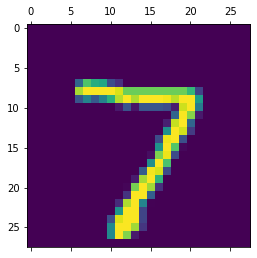

In [49]:
plt.matshow(X_test[0])

In [50]:
#np.argmax finds a maximum element from an array and returns the index of it
np.argmax(y_predicted[0])

7

In [55]:
np.argmax(y_predicted[1])

2

In [51]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [52]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [56]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [53]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 962,    0,    0,    2,    0,    5,    6,    2,    3,    0],
       [   0, 1110,    3,    2,    0,    1,    4,    2,   13,    0],
       [   7,   11,  895,   19,    7,    5,   13,   11,   60,    4],
       [   4,    0,   11,  909,    0,   28,    2,   13,   35,    8],
       [   1,    1,    2,    1,  907,    0,   12,    5,   11,   42],
       [   9,    3,    1,   20,    8,  780,   14,    8,   42,    7],
       [   9,    3,    4,    1,    7,   12,  914,    2,    6,    0],
       [   1,    6,   20,    4,    5,    0,    0,  954,    5,   33],
       [   4,    7,    5,   12,    9,   20,    7,   10,  893,    7],
       [   9,    7,    1,    7,   21,    6,    0,   23,   14,  921]])>

Text(69.0, 0.5, 'Truth')

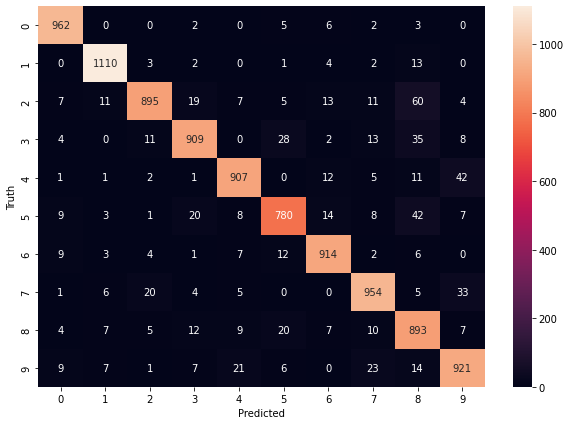

In [54]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')   #the no. which are not in diagonals are errors

## Using hidden layer

In [63]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattend, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2743 - accuracy: 0.9227
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1231 - accuracy: 0.9632
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0860 - accuracy: 0.9747
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0649 - accuracy: 0.9803
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0521 - accuracy: 0.9841


In [64]:
model.evaluate(X_test_flattend,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0875 - accuracy: 0.9728


[0.08749918639659882, 0.9728000164031982]

### Result = By using hidden layer accuracy goest to 92% to 97% !

313/313 [==============================] - 1s 2ms/step


Text(69.0, 0.5, 'Truth')

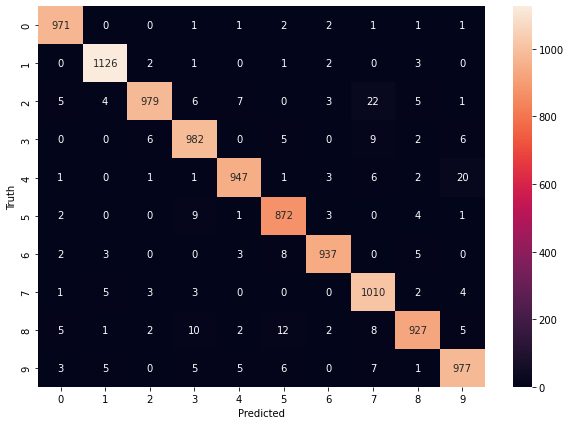

In [65]:
y_predicted = model.predict(X_test_flattend)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Now , we can see that errors numbers are decresed


## Using Flatten layer so that we don't have to call .reshape on input dataset

In [66]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2694 - accuracy: 0.9240
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1224 - accuracy: 0.9633
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0859 - accuracy: 0.9741
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0660 - accuracy: 0.9797
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0516 - accuracy: 0.9844
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0422 - accuracy: 0.9869
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0343 - accuracy: 0.9893
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0285 - accuracy: 0.9911
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0231 - accuracy: 0.9929
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.020

In [67]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0908 - accuracy: 0.9745


[0.09075397998094559, 0.9745000004768372]